In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes #importing data
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn import metrics
from scipy.stats import loguniform

In [2]:
diab = load_diabetes()
X = diab['data']
y = diab['target']
print(X.shape, y.shape)


(442, 10) (442,)


In [3]:
df = pd.DataFrame(X, columns=["age","sex","bmi","bp", "tc", "ldl", "hdl","tch", "ltg", "glu"])
df['progression'] = diab['target']
df.head()

,age,sex,bmi,bp,tc,ldl,hdl,tch,ltg,glu,progression
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0


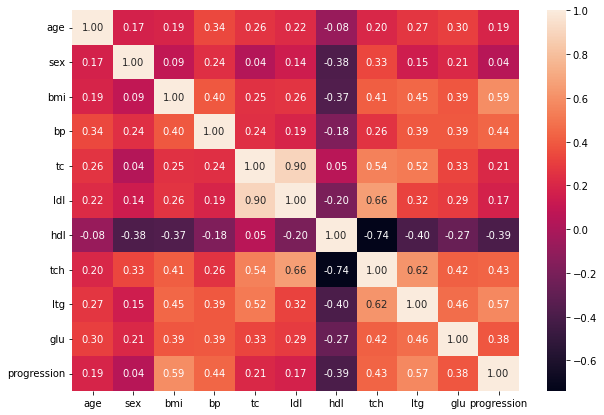

In [4]:
df.head()
plt.figure(figsize=(10, 7))
dataplot = sns.heatmap(df.corr(), annot=True, fmt='.2f')

<Figure size 720x504 with 0 Axes>

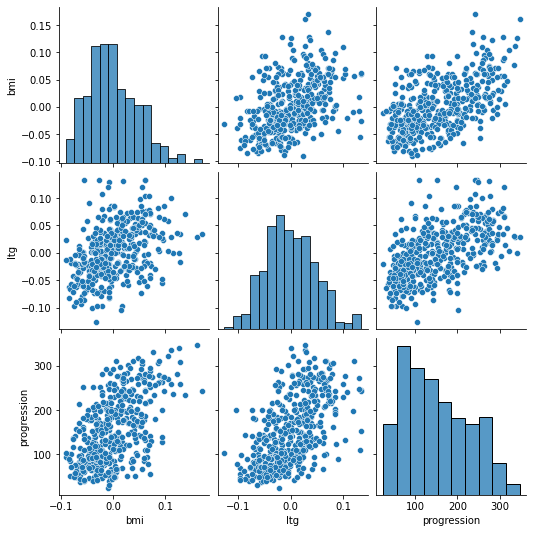

In [5]:
plt.figure(figsize=(10, 7))
sns.pairplot(df[['bmi', 'ltg', 'progression']])

Text(0, 0.5, 'PROGRESSION')

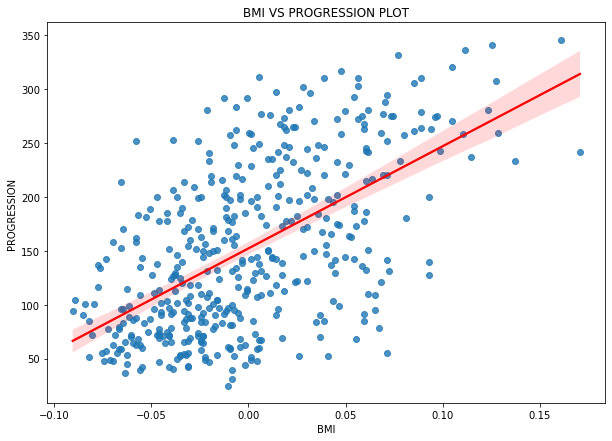

In [6]:
plt.figure(figsize=(10, 7))
sns.regplot(data=df, x='bmi', y='progression',line_kws={"color": "red"})
plt.title('BMI VS PROGRESSION PLOT')
plt.xlabel('BMI')
plt.ylabel('PROGRESSION')

In [11]:
X = df.iloc[:,:-1]
y = df['progression']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)
reg = LinearRegression().fit(X_train, y_train)
y_test_pred = reg.predict(X_test)
y_train_pred = reg.predict(X_train)
print(f'the intercept is:{reg.intercept_: .2f}')
#slope
print(f'the slope is:{reg.coef_}')
#R^2
print(f'Coeff. of determination on train set:{reg.score(X_train, y_train): .2f}') #train set
print(f'Coeff. of determination on test set:{reg.score(X_test, y_test): .2f}') #test set
print(f'The mean absolute error is:{metrics.mean_absolute_error(y_test, y_test_pred): .2f}')
print(f'The root mean squared error is:{np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)): .2f}')

the intercept is: 151.35
the slope is:[  37.90031426 -241.96624835  542.42575342  347.70830529 -931.46126093
  518.04405547  163.40353476  275.31003837  736.18909839   48.67112488]
Coeff. of determination on train set: 0.53
Coeff. of determination on test set: 0.45
The mean absolute error is: 42.79
The root mean squared error is: 53.85


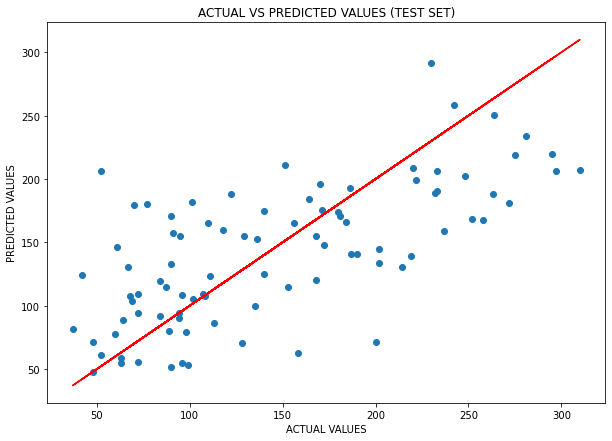

In [12]:
plt.figure(figsize=(10, 7))
plt.scatter(y_test, y_test_pred)
plt.plot(y_test, y_test, color='r')
plt.title('ACTUAL VS PREDICTED VALUES (TEST SET)')
plt.xlabel('ACTUAL VALUES')
plt.ylabel('PREDICTED VALUES')
plt.show()
